In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from extra_function import identify_quantiles

In [2]:
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")

In [3]:
temp_df = pd.read_csv("data/jenny/temperature_clean.csv").iloc[:,1:]
temp_df = temp_df[temp_df["Day"] != 29]
temp_df.head(5)

,TEMP,WINDCHILL,RELATIVE_HUMIDITY,WIND_SPEED,UTC_DATE,DEW_POINT_TEMP,Year,Month,Day,Time,Date
0,6.4,NaN,60.0,8.0,2018-04-02 00:00:00,-0.8,2018,4,2,00:00:00,2018-04-02
1,5.7,NaN,68.0,10.0,2018-04-02 01:00:00,0.3,2018,4,2,01:00:00,2018-04-02
2,6.2,NaN,50.0,5.0,2018-04-02 02:00:00,-3.5,2018,4,2,02:00:00,2018-04-02
3,5.7,NaN,51.0,6.0,2018-04-02 03:00:00,-3.5,2018,4,2,03:00:00,2018-04-02
4,4.7,NaN,58.0,3.0,2018-04-02 04:00:00,-3.0,2018,4,2,04:00:00,2018-04-02


In [4]:
temp_df['Month_Day'] = pd.to_datetime(temp_df.Date, format='%Y-%m-%d').dt.strftime('%m-%d')
temp_df["Date"] = pd.to_datetime(temp_df["Date"])
temp_df

,TEMP,WINDCHILL,RELATIVE_HUMIDITY,WIND_SPEED,UTC_DATE,DEW_POINT_TEMP,Year,Month,Day,Time,Date,Month_Day
0,6.4,NaN,60.0,8.0,2018-04-02 00:00:00,-0.8,2018,4,2,00:00:00,2018-04-02,04-02
1,5.7,NaN,68.0,10.0,2018-04-02 01:00:00,0.3,2018,4,2,01:00:00,2018-04-02,04-02
2,6.2,NaN,50.0,5.0,2018-04-02 02:00:00,-3.5,2018,4,2,02:00:00,2018-04-02,04-02
3,5.7,NaN,51.0,6.0,2018-04-02 03:00:00,-3.5,2018,4,2,03:00:00,2018-04-02,04-02
4,4.7,NaN,58.0,3.0,2018-04-02 04:00:00,-3.0,2018,4,2,04:00:00,2018-04-02,04-02
...,...,...,...,...,...,...,...,...,...,...,...,...
53368,17.5,NaN,56.0,2.0,2024-05-14 02:00:00,8.7,2024,5,14,02:00:00,2024-05-14,05-14
53369,15.2,NaN,68.0,3.0,2024-05-14 03:00:00,9.3,2024,5,14,03:00:00,2024-05-14,05-14
53370,13.2,NaN,78.0,1.0,2024-05-14 04:00:00,9.5,2024,5,14,04:00:00,2024-05-14,05-14
53371,11.8,NaN,83.0,0.0,2024-05-14 05:00:00,9.0,2024,5,14,05:00:00,2024-05-14,05-14


In [5]:
temp_df["TEMP_DAILY"] = temp_df.groupby(["Date"])["TEMP"].transform('mean')
temp_df.head(5)

,TEMP,WINDCHILL,RELATIVE_HUMIDITY,WIND_SPEED,UTC_DATE,DEW_POINT_TEMP,Year,Month,Day,Time,Date,Month_Day,TEMP_DAILY
0,6.4,NaN,60.0,8.0,2018-04-02 00:00:00,-0.8,2018,4,2,00:00:00,2018-04-02,04-02,4.516667
1,5.7,NaN,68.0,10.0,2018-04-02 01:00:00,0.3,2018,4,2,01:00:00,2018-04-02,04-02,4.516667
2,6.2,NaN,50.0,5.0,2018-04-02 02:00:00,-3.5,2018,4,2,02:00:00,2018-04-02,04-02,4.516667
3,5.7,NaN,51.0,6.0,2018-04-02 03:00:00,-3.5,2018,4,2,03:00:00,2018-04-02,04-02,4.516667
4,4.7,NaN,58.0,3.0,2018-04-02 04:00:00,-3.0,2018,4,2,04:00:00,2018-04-02,04-02,4.516667


In [6]:
print(temp_df.dtypes)

TEMP                        float64
WINDCHILL                   float64
RELATIVE_HUMIDITY           float64
WIND_SPEED                  float64
UTC_DATE                     object
DEW_POINT_TEMP              float64
Year                          int64
Month                         int64
Day                           int64
Time                         object
Date                 datetime64[ns]
Month_Day                    object
TEMP_DAILY                  float64
dtype: object


In [7]:
temp_2022 = temp_df[temp_df["Year"] == 2022]
temp_2022.head()

,TEMP,WINDCHILL,RELATIVE_HUMIDITY,WIND_SPEED,UTC_DATE,DEW_POINT_TEMP,Year,Month,Day,Time,Date,Month_Day,TEMP_DAILY
32653,-3.0,NaN,74.0,0.0,2022-01-01 00:00:00,-7.0,2022,1,1,00:00:00,2022-01-01,01-01,-6.220833
32654,-5.2,NaN,92.0,0.0,2022-01-01 01:00:00,-6.3,2022,1,1,01:00:00,2022-01-01,01-01,-6.220833
32655,-6.6,-7.0,93.0,1.0,2022-01-01 02:00:00,-7.5,2022,1,1,02:00:00,2022-01-01,01-01,-6.220833
32656,-8.6,NaN,93.0,0.0,2022-01-01 03:00:00,-9.5,2022,1,1,03:00:00,2022-01-01,01-01,-6.220833
32657,-9.9,NaN,91.0,0.0,2022-01-01 04:00:00,-11.0,2022,1,1,04:00:00,2022-01-01,01-01,-6.220833


In [8]:
temp_df_ = temp_df.drop_duplicates(subset=["Date"])
temp_df_.head(3)

,TEMP,WINDCHILL,RELATIVE_HUMIDITY,WIND_SPEED,UTC_DATE,DEW_POINT_TEMP,Year,Month,Day,Time,Date,Month_Day,TEMP_DAILY
0,6.4,NaN,60.0,8.0,2018-04-02 00:00:00,-0.8,2018,4,2,00:00:00,2018-04-02,04-02,4.516667
24,10.2,NaN,42.0,7.0,2018-04-03 00:00:00,-2.0,2018,4,3,00:00:00,2018-04-03,04-03,6.229167
48,8.8,NaN,55.0,6.0,2018-04-04 00:00:00,0.4,2018,4,4,00:00:00,2018-04-04,04-04,5.308333


<Axes: xlabel='Date', ylabel='TEMP'>

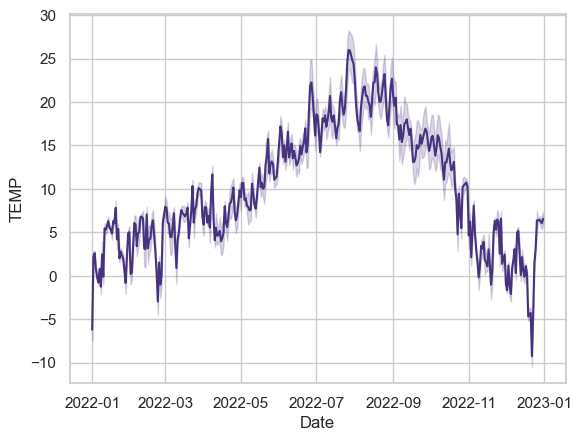

In [9]:
sns.lineplot(data=temp_2022, x="Date", y="TEMP")

<Axes: xlabel='Date', ylabel='TEMP'>

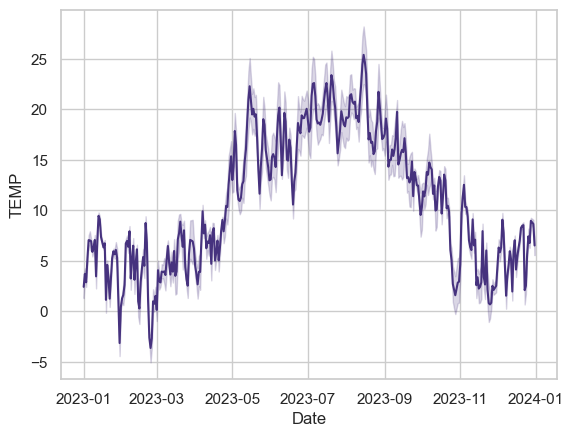

In [10]:
temp_2023 = temp_df[temp_df["Year"] == 2023]
sns.lineplot(data=temp_2023, x="Date", y="TEMP")

In [11]:
temp_df_

,TEMP,WINDCHILL,RELATIVE_HUMIDITY,WIND_SPEED,UTC_DATE,DEW_POINT_TEMP,Year,Month,Day,Time,Date,Month_Day,TEMP_DAILY
0,6.4,NaN,60.0,8.0,2018-04-02 00:00:00,-0.8,2018,4,2,00:00:00,2018-04-02,04-02,4.516667
24,10.2,NaN,42.0,7.0,2018-04-03 00:00:00,-2.0,2018,4,3,00:00:00,2018-04-03,04-03,6.229167
48,8.8,NaN,55.0,6.0,2018-04-04 00:00:00,0.4,2018,4,4,00:00:00,2018-04-04,04-04,5.308333
72,5.5,NaN,91.0,3.0,2018-04-05 00:00:00,4.1,2018,4,5,00:00:00,2018-04-05,04-05,6.437500
96,9.0,NaN,95.0,3.0,2018-04-06 00:00:00,8.3,2018,4,6,00:00:00,2018-04-06,04-06,9.470833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53270,26.2,NaN,26.0,6.0,2024-05-10 00:00:00,5.4,2024,5,10,00:00:00,2024-05-10,05-10,17.112500
53294,27.1,NaN,28.0,7.0,2024-05-11 00:00:00,6.8,2024,5,11,00:00:00,2024-05-11,05-11,17.762500
53318,25.5,NaN,36.0,7.0,2024-05-12 00:00:00,9.5,2024,5,12,00:00:00,2024-05-12,05-12,16.395833
53342,21.4,NaN,40.0,7.0,2024-05-13 00:00:00,7.4,2024,5,13,00:00:00,2024-05-13,05-13,14.641667


In [12]:
def identify_quantiles(df, col):

      first = df[col].quantile(0.25)
      second = df[col].quantile(0.5)
      third = df[col].quantile(0.75)

      def mark_quantiles(row, col):
            if row[col] < first:
                  return "First Quantile"
            elif (row[col] >= second) & (row[col] < third):
                  return "Second Quantile"
            else:
                  return "Third Quantile"

      df["Quantile"] = df.apply(lambda row: mark_quantiles(row, col), axis=1)

      sns.countplot(df, x="Quantile", hue="Year", order=["First Quantile", "Second Quantile", "Third Quantile"])
      plt.figure(figsize=(10, 6))
      plt.show()
      return df

/var/folders/c5/pphx1c0n3lb12sy85_ybqxqm0000gn/T/ipykernel_31065/3265995902.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Quantile"] = df.apply(lambda row: mark_quantiles(row, col), axis=1)


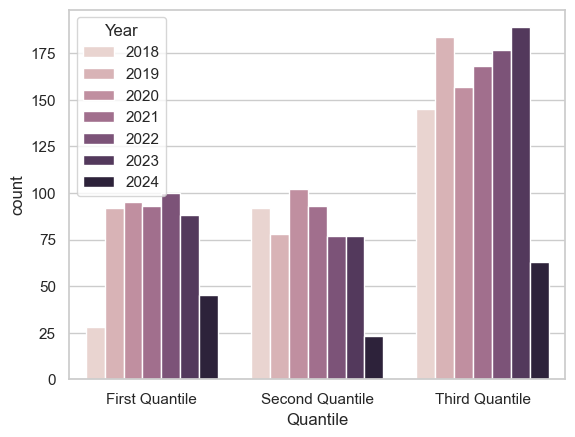

<Figure size 1000x600 with 0 Axes>

,TEMP,WINDCHILL,RELATIVE_HUMIDITY,WIND_SPEED,UTC_DATE,DEW_POINT_TEMP,Year,Month,Day,Time,Date,Month_Day,TEMP_DAILY,Quantile
0,6.4,NaN,60.0,8.0,2018-04-02 00:00:00,-0.8,2018,4,2,00:00:00,2018-04-02,04-02,4.516667,First Quantile
24,10.2,NaN,42.0,7.0,2018-04-03 00:00:00,-2.0,2018,4,3,00:00:00,2018-04-03,04-03,6.229167,Third Quantile
48,8.8,NaN,55.0,6.0,2018-04-04 00:00:00,0.4,2018,4,4,00:00:00,2018-04-04,04-04,5.308333,Third Quantile
72,5.5,NaN,91.0,3.0,2018-04-05 00:00:00,4.1,2018,4,5,00:00:00,2018-04-05,04-05,6.437500,Third Quantile
96,9.0,NaN,95.0,3.0,2018-04-06 00:00:00,8.3,2018,4,6,00:00:00,2018-04-06,04-06,9.470833,Third Quantile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53270,26.2,NaN,26.0,6.0,2024-05-10 00:00:00,5.4,2024,5,10,00:00:00,2024-05-10,05-10,17.112500,Third Quantile
53294,27.1,NaN,28.0,7.0,2024-05-11 00:00:00,6.8,2024,5,11,00:00:00,2024-05-11,05-11,17.762500,Third Quantile
53318,25.5,NaN,36.0,7.0,2024-05-12 00:00:00,9.5,2024,5,12,00:00:00,2024-05-12,05-12,16.395833,Third Quantile
53342,21.4,NaN,40.0,7.0,2024-05-13 00:00:00,7.4,2024,5,13,00:00:00,2024-05-13,05-13,14.641667,Second Quantile


In [13]:
temp_df2 = identify_quantiles(temp_df_, "TEMP_DAILY")
temp_df2

<Axes: xlabel='Year', ylabel='TEMP'>

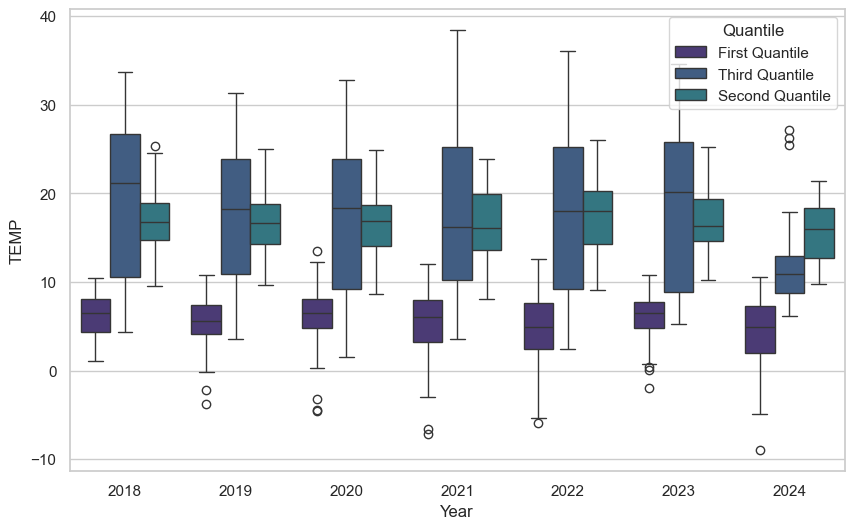

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=temp_df2, x="Year", y="TEMP", hue="Quantile")

In [26]:
quantile_count = pd.DataFrame(temp_df2["Quantile"].value_counts())
display(quantile_count)
quantile_count_list = quantile_count["count"].values.tolist()
quantile_count_list

,count
Quantile,
Third Quantile,1083
Second Quantile,542
First Quantile,541


[1083, 542, 541]

(-1.09999814600467, 1.0999997531103942, -1.0999980639879983, 1.099998030760292)

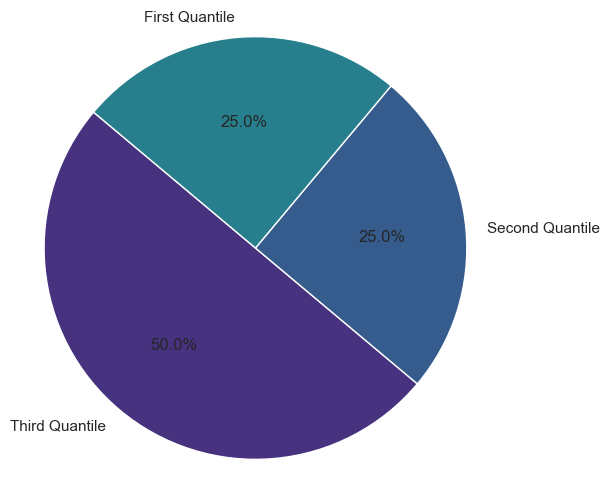

In [25]:

plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(quantile_count_list, labels=["Third Quantile", "Second Quantile", "First Quantile"], 
        autopct='%1.1f%%', startangle=140)  # Plot the pie chart
plt.axis('equal') 